<a href="https://colab.research.google.com/github/feiduobaby/good-first-issue/blob/main/Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl
import os
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp -r /content/drive/MyDrive/114239_nfl_competition_files_published_analytics_final /content/

In [4]:
# Paths and constants
input_path = '/content/114239_nfl_competition_files_published_analytics_final/train'
def read_selected_data(input_path):
    # Define the directory containing your data files

    # List three specific Parquet files you want to read
    selected_files = [f"input_2023_w0{i}.csv" for i in range(1,10)]+[f"input_2023_w{i}.csv" for i in range(10,19)]
    # Load and filter the data from only the selected Parquet files
    dfs = []
    for file_name in selected_files:
        file_path = f'{input_path}/{file_name}'
        lazy_df = pl.scan_csv(file_path)
        df = lazy_df.collect()
        dfs.append(df)

    # Concatenate all dataframes into a single dataframe
    full_df = pl.concat(dfs)

    return full_df

2. Describe Some Data

In [5]:
df=read_selected_data(input_path)
df.head()

game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
i64,i64,bool,i64,i64,str,i64,str,str,i64,str,str,str,str,f64,f64,f64,f64,f64,f64,i64,f64,f64
2023090700,101,false,54527,1,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.33,36.94,0.09,0.39,322.4,238.24,21,63.259998,-0.22
2023090700,101,false,54527,2,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2023090700,101,false,54527,3,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.33,36.93,0.12,0.73,147.55,240.6,21,63.259998,-0.22
2023090700,101,false,54527,4,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.35,36.92,0.23,0.81,131.4,244.25,21,63.259998,-0.22
2023090700,101,false,54527,5,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.37,36.9,0.35,0.82,123.26,244.25,21,63.259998,-0.22


In [6]:
df.select(pl.all().is_null().any())

game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false


In [7]:
df.describe()

statistic,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
str,f64,f64,f64,f64,f64,str,f64,str,str,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,"""4880579""",4.880579e6,"""4880579""","""4880579""",4.880579e6,"""4880579""","""4880579""","""4880579""","""4880579""",4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2.0232e9,2196.408924,0.267067,49558.903219,16.131788,null,60.550452,null,null,211.278286,null,null,null,null,60.500736,26.811895,3.019878,2.118335,180.497185,181.536618,11.64147,60.51581,26.637664
"""std""",201140.46685,1246.426122,null,5210.337609,11.130079,null,23.059354,null,null,22.177471,null,null,null,null,23.489191,10.006199,2.227939,1.415794,100.716153,98.009122,5.331537,25.296428,15.438138
"""min""",2.0231e9,54.0,0.0,30842.0,1.0,"""left""",11.0,"""A'Shawn Robinson""","""5-10""",153.0,"""1984-05-19""","""CB""","""Defense""","""Defensive Coverage""",0.41,0.62,0.0,0.0,0.0,0.0,5.0,-5.26,-3.91
"""25%""",2.0231e9,1150.0,null,45198.0,8.0,null,41.0,null,null,195.0,null,null,null,null,42.63,18.99,1.09,1.01,90.91,91.74,8.0,42.610001,13.3
"""50%""",2.0231e9,2171.0,null,52413.0,15.0,null,61.0,null,null,207.0,null,null,null,null,60.41,26.85,2.72,1.92,179.56,180.14,10.0,60.509998,26.469999
"""75%""",2.0231e9,3246.0,null,54500.0,22.0,null,80.0,null,null,225.0,null,null,null,null,78.23,34.62,4.62,3.04,270.83,271.58,14.0,78.470001,39.869999
"""max""",2.0240e9,5258.0,1.0,56673.0,123.0,"""right""",109.0,"""Zyon McCollum""","""6-9""",358.0,"""2002-10-05""","""WR""","""Offense""","""Targeted Receiver""",119.86,52.88,12.53,17.12,360.0,360.0,94.0,125.849998,57.330002


In [8]:
df.select(
    pl.col("player_to_predict").value_counts(sort=True)
).unnest("player_to_predict")

player_to_predict,count
bool,u32
false,3577139
true,1303440


In [9]:
df.group_by(
    (pl.col("play_id")).alias("play_id"),
    maintain_order=True,
).len()

play_id,len
i64,u32
101,2993
194,1614
219,1333
361,1320
436,1095
…,…
2852,948
920,234
3679,348


3. Generate height-weight hit matrix

In [11]:
np.sort(df["player_height"].unique())

array(['5-10', '5-11', '5-6', '5-7', '5-8', '5-9', '6-0', '6-1', '6-2',
       '6-3', '6-4', '6-5', '6-6', '6-7', '6-8', '6-9'], dtype='<U4')

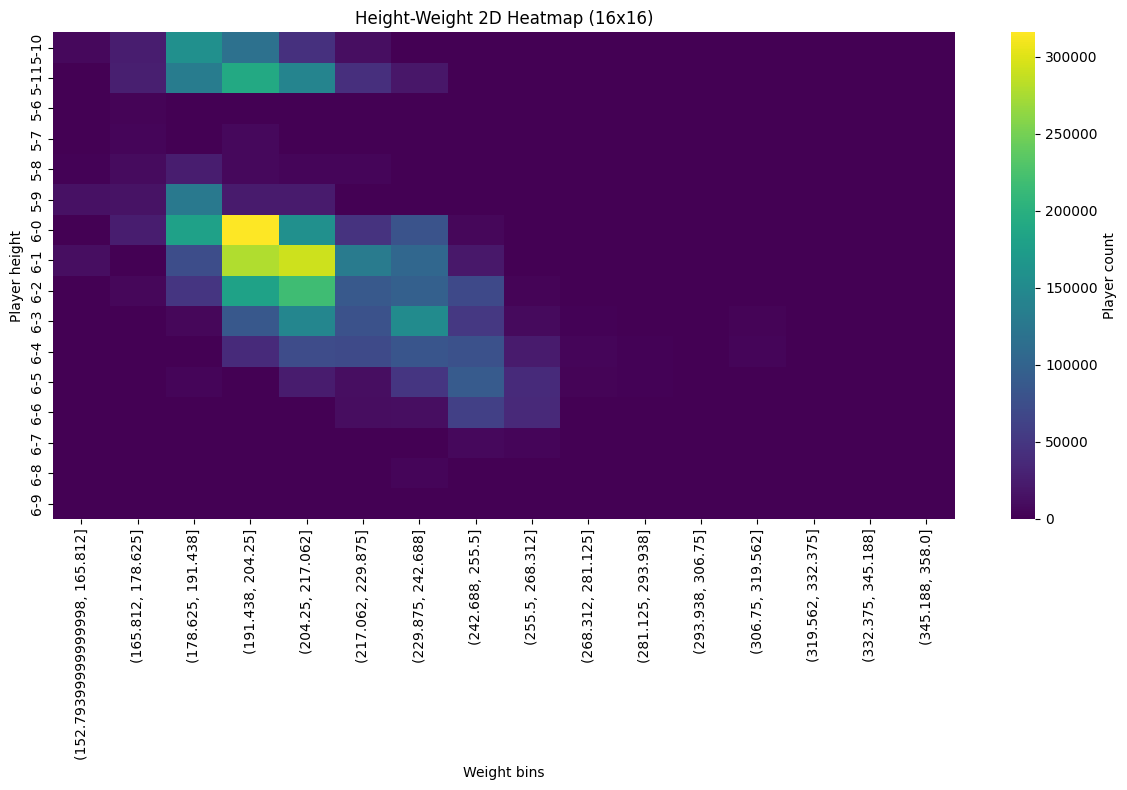

In [13]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df 是你的 polars.DataFrame，包含 player_height, player_weight

# 1) 转成 pandas
pdf = df.to_pandas()

# 2) 体重分 16 等宽区间
pdf["weight_bin"] = pd.cut(
    pdf["player_weight"],
    bins=16,
    include_lowest=True
)

# 3) 生成 16x16 频数表
heat_df = pd.crosstab(
    index=pdf["player_height"],
    columns=pdf["weight_bin"]
)

# 4) 画热力图
plt.figure(figsize=(12, 8))
sns.heatmap(
    heat_df,
    cmap="viridis",
    cbar_kws={"label": "Player count"}
)
plt.xlabel("Weight bins")
plt.ylabel("Player height")
plt.title("Height-Weight 2D Heatmap (16x16)")
plt.tight_layout()
plt.show()

4. Choose specific game_id, frame_id, player_id to generate trajectory

In [15]:
df["game_id"]

game_id
i64
2023090700
2023090700
2023090700
2023090700
2023090700
…
2024010713
2024010713
2024010713


In [17]:
import polars as pl

play_ids = (
    df
    .filter(pl.col("game_id") == 2023090700)
    .select("play_id")
    .unique()
)

print(play_ids)

shape: (58, 1)
┌─────────┐
│ play_id │
│ ---     │
│ i64     │
╞═════════╡
│ 194     │
│ 1618    │
│ 736     │
│ 1837    │
│ 3324    │
│ …       │
│ 2435    │
│ 461     │
│ 3185    │
│ 3486    │
│ 1869    │
└─────────┘


In [18]:
nfl_ids_list = (
    df
    .filter(
        (pl.col("game_id") == 2023090700) &
        (pl.col("play_id") == 2510)
    )
    .select("nfl_id")
    .unique()
    .to_series()
    .to_list()
)
print(nfl_ids_list)

[44906, 54716, 55882, 53591, 54562, 44822, 46309, 53953, 55910, 46243, 53542, 54519, 47888]


In [20]:
import polars as pl

track = (
    df
    .filter(
        (pl.col("game_id") == 2023090700) &
        (pl.col("play_id") == 2510) &
        (pl.col("nfl_id") == 53953)
    )
    .sort("frame_id")   # 按时间/帧排序
)

In [21]:
pdf = track.to_pandas()

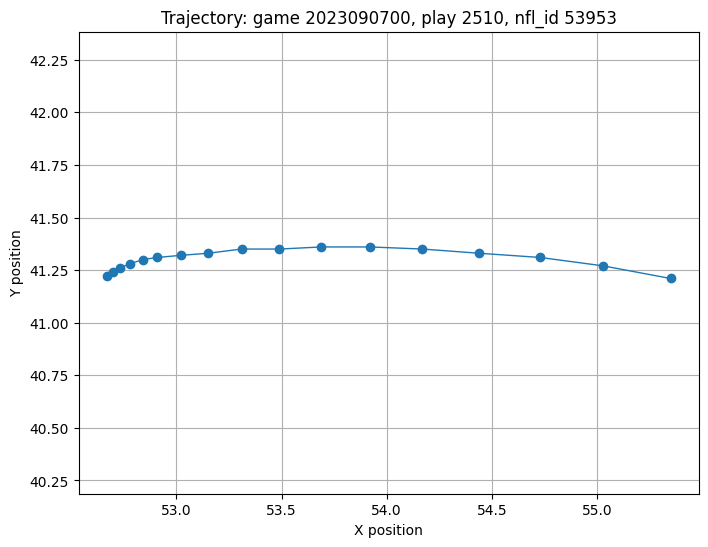

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(
    pdf["x"],
    pdf["y"],
    marker="o",    # 每一帧一个点
    linewidth=1    # 把点连成线
)
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("Trajectory: game 2023090700, play 2510, nfl_id 53953")
plt.axis("equal")   # 保持比例，不拉伸场地
plt.grid(True)
plt.show()